In [ ]:
# Install necessary packages
!pip install huggingface_hub
!pip install transformers
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 9.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 316.1/316.1 kB 18.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:

# Relevant imports
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch


In [ ]:
# Load data
df = pd.read_csv('/content/Extended_Course_Feedback_Dataset.csv')

In [ ]:
df.shape

(2000, 2)

In [ ]:
df.head()

COMMENT          LABEL
0  "This course exceeded my expectations in every...  very positive
1  "The instructor was incredibly knowledgeable a...  very positive
2  "I learned so much and feel very confident in ...  very positive
3  "The course materials were comprehensive and e...  very positive
4  "The interactive sessions made learning fun an...  very positive

In [ ]:
df.value_counts('LABEL')

LABEL
very negative    536
negative         485
very positive    339
neutral          336
positive         304
Name: count, dtype: int64

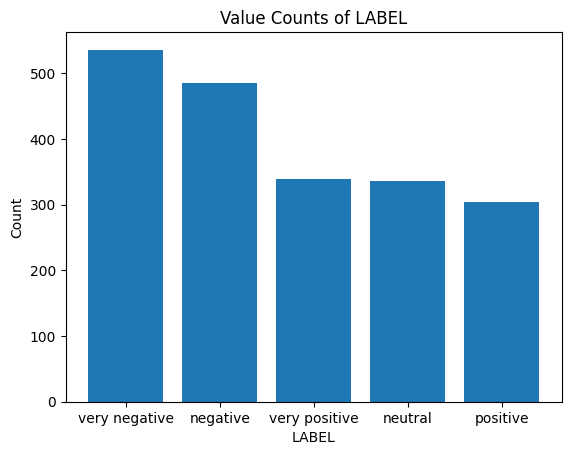

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df['LABEL'].value_counts().index, df['LABEL'].value_counts().values) # Call the bar function directly from plt
plt.xlabel('LABEL')
plt.ylabel('Count')
plt.title('Value Counts of LABEL')
plt.show()

In [ ]:
# Replacing text labels with numerical values
label_mapping = {
    'very positive': 5,
    'positive': 4,
    'neutral': 3,
    'negative': 2,
    'very negative': 1
}

In [ ]:
df['LABEL'].replace(label_mapping, inplace=True)

In [ ]:
df['LABEL'] = df['LABEL'] - 1

In [ ]:
# Renaming columns
df = df.rename(columns={'COMMENT': 'text', 'LABEL': 'labels'})

In [ ]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size=0.25, random_state=42)

In [ ]:
# Preparing the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenizing the data
train_encodings = tokenizer(x_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(x_test.tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
# Converting the data into datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': y_train.tolist()
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': y_test.tolist()
})

In [ ]:
# Loading the model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy="epoch"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics = compute_metrics
)

In [ ]:
# Training
trainer.train()

TrainOutput(global_step=564, training_loss=0.4692317943405756, metrics={'train_runtime': 1576.6428, 'train_samples_per_second': 2.854, 'train_steps_per_second': 0.358, 'total_flos': 43938674181000.0, 'train_loss': 0.4692317943405756, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate(eval_dataset=test_dataset)
print(f"Accuracy: {results['eval_accuracy']}")
print(f"Precision: {results['eval_precision']}")
print(f"Recall: {results['eval_recall']}")
print(f"F1 Score: {results['eval_f1']}")


Accuracy: 0.976
Precision: 0.9760327484308425
Recall: 0.976
F1 Score: 0.975996098829062


In [ ]:
predictions, labels, _ = trainer.predict(test_dataset)
preds = np.argmax(predictions, axis = 1)

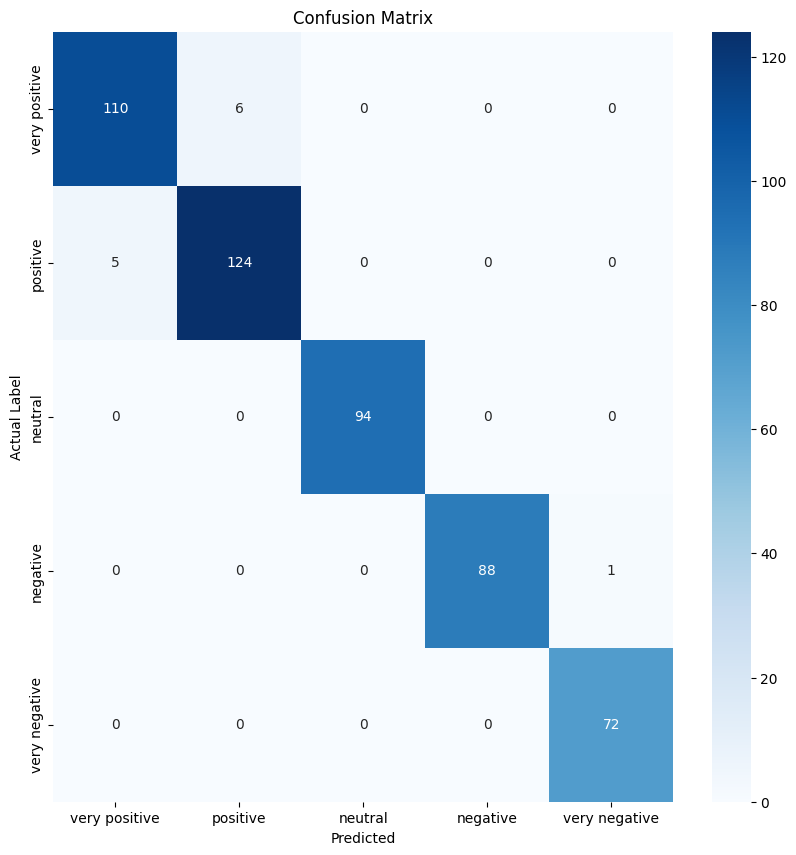

In [ ]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues',xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
model.save_pretrained('/content/model')
tokenizer.save_pretrained('/content/tokenizer')

('/content/tokenizer/tokenizer_config.json',
 '/content/tokenizer/special_tokens_map.json',
 '/content/tokenizer/vocab.txt',
 '/content/tokenizer/added_tokens.json',
 '/content/tokenizer/tokenizer.json')

In [ ]:
def predict_sentiment(comment: str):
    # Tokenize the input comment
    inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Get the label with the highest probability
    predicted_label = torch.argmax(logits, dim=1).item()

    # Map the predicted label to the sentiment
    label_mapping = {0: 'very negative', 1: 'negative', 2: 'neutral', 3: 'positive', 4: 'very positive'}
    sentiment = label_mapping.get(predicted_label, "Unknown")

    return sentiment


In [ ]:
comment = input("Enter a comment: ")
predicted_sentiment = predict_sentiment(comment)
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a comment: the food was great
Predicted Sentiment: neutral


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks', exist_ok = True)
model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/model')
tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/tokenizer')
print("Model and tokenizer have been saved")